In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras import layers, models

In [9]:
# Load data
df = pd.read_csv(r'C:\Users\itzme\OneDrive\Documents\shopping_trends.csv')  # Windows path
  # Replace with your CSV or data source


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [11]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [12]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [16]:
# Handling missing values
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [18]:
# Encoding categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [19]:
# Merge encoded data with numerical features
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

In [20]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [21]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=10)  # Retain top 10 components
df_pca = pca.fit_transform(df_scaled)
print("Explained variance by each component: ", pca.explained_variance_ratio_)

Explained variance by each component:  [0.02939535 0.01836484 0.01619683 0.01157148 0.01118248 0.01049805
 0.01037374 0.01018427 0.00999765 0.00982782]


In [24]:
# Autoencoder Model Definition
autoencoder = tf.keras.Sequential([
    tf.keras.Input(shape=(df_pca.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(df_pca.shape[1], activation='sigmoid')
])


In [25]:
# Autoencoder Model (Keras Functional API)
input_dim = df_pca.shape[1]
input_layer = layers.Input(shape=(input_dim,))

In [26]:
# Encoder
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
latent = layers.Dense(32, activation='relu')(encoded)

In [27]:
# Decoder
decoded = layers.Dense(64, activation='relu')(latent)
decoded = layers.Dense(128, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

In [28]:
# Autoencoder Model
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(df_pca, df_pca, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
98/98 [==============================] - 2s 8ms/step - loss: 1.5331 - val_loss: 1.6011
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 1.1469 - val_loss: 1.4519
Epoch 3/50
98/98 [==============================] - 0s 5ms/step - loss: 1.1090 - val_loss: 1.4487
Epoch 4/50
98/98 [==============================] - 0s 5ms/step - loss: 1.1060 - val_loss: 1.4457
Epoch 5/50
98/98 [==============================] - 0s 5ms/step - loss: 1.1048 - val_loss: 1.4433
Epoch 6/50
98/98 [==============================] - 1s 5ms/step - loss: 1.1042 - val_loss: 1.4442
Epoch 7/50
98/98 [==============================] - 1s 6ms/step - loss: 1.1040 - val_loss: 1.4438
Epoch 8/50
98/98 [==============================] - 0s 4ms/step - loss: 1.1036 - val_loss: 1.4430
Epoch 9/50
98/98 [==============================] - 0s 4ms/step - loss: 1.1033 - val_loss: 1.4425
Epoch 10/50
98/98 [==============================] - 0s 4ms/step - loss: 1.1033 - val_loss: 1.4425
Epoch 11/50
98/98 [

In [30]:
# Extract Encoder Model
encoder = models.Model(inputs=input_layer, outputs=latent)
latent_features = encoder.predict(df_pca)

122/122 [==============================] - 0s 1ms/step


In [31]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(latent_features)


In [32]:
# Evaluate with silhouette score
sil_score = silhouette_score(latent_features, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1364


In [33]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(latent_features)
    score = silhouette_score(latent_features, preds)
    silhouette_scores.append(score)


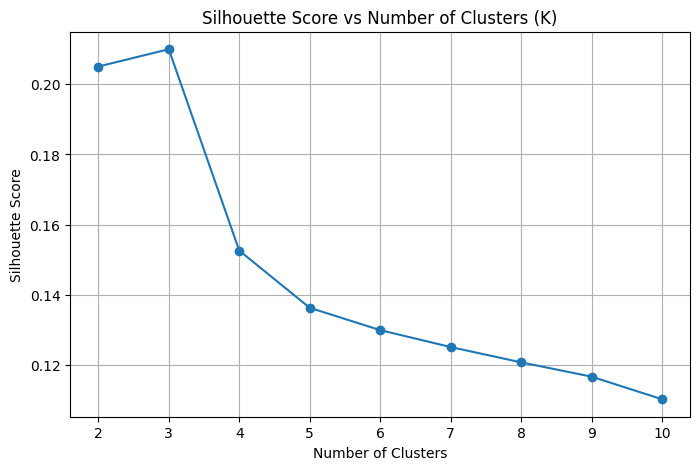

In [34]:
# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [35]:
# Best K
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters: {best_k}")

Best number of clusters: 3


In [36]:
# Visualizing clusters in 2D PCA
pca_2d = PCA(n_components=2)
components = pca_2d.fit_transform(latent_features)

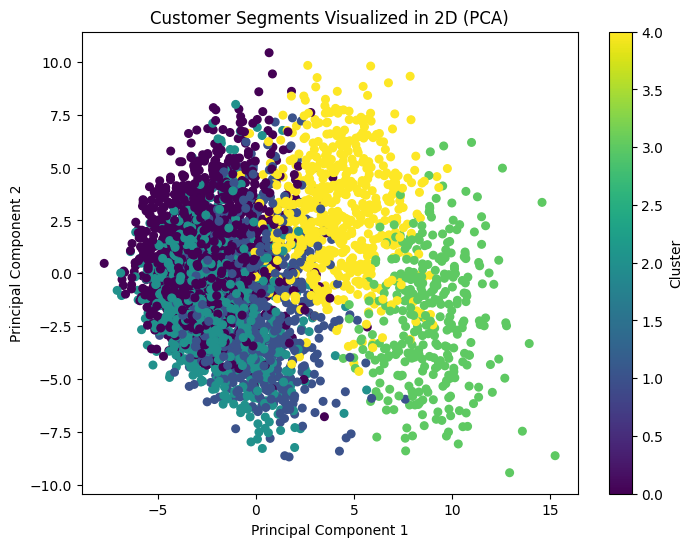

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("Customer Segments Visualized in 2D (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()